Using LDA, QDA, and random forest classifiers to decode stim, and call_type

Apply PCA before these procedures

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from data_loader import SessionDataLoader
from lda import discriminate
from spikes.filters import gaussian_filter, exp_filter
from spikes.binning import bin_spikes

%load_ext autoreload
%autoreload 2%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
data_loader = SessionDataLoader("YelBlu6903F", 1)
table = data_loader.load_table()

In [7]:
table = table[table["call_type"] != "None"]
table = table.copy()

In [8]:
t_arr, spikes = bin_spikes(table["spike_times"], min_time=0.0, max_time=0.6)
spikes_filtered = exp_filter(spikes, 5.0)

table["binned_spikes"] = spikes.tolist()
table["psth"] = spikes_filtered.tolist()

In [11]:
X = np.array(table["psth"].tolist())
Y = np.array(table["stim"])

In [28]:
DIMS = [2, 4, 6, 8, 12, 16, 24, 32, 48]
lda_scores = np.zeros_like(DIMS)
qda_scores = np.zeros_like(DIMS)
rf_scores = np.zeros_like(DIMS)

lda_std = np.zeros_like(DIMS)
qda_std = np.zeros_like(DIMS)
rf_std = np.zeros_like(DIMS)

In [30]:
for i, dim in enumerate(DIMS):
    result = discriminate(X, Y, folds=10, ndim=dim)
    lda_scores[i] = result["lda_acc"] * 100.0
    qda_scores[i] = result["qda_acc"] * 100.0
    rf_scores[i] = result["rf_acc"] * 100.0
    
    lda_std[i] = result["lda_acc_std"] * 100.0
    qda_std[i] = result["qda_acc_std"] * 100.0
    rf_std[i] = result["rf_acc_std"] * 100.0

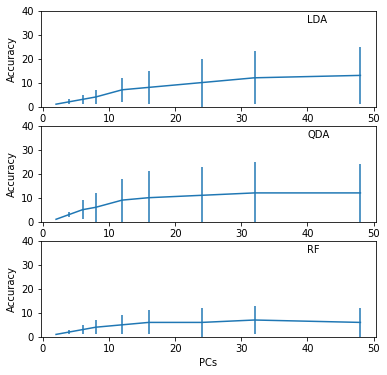

In [36]:
plt.figure(figsize=(6, 6))
plt.subplot(3, 1, 1)
plt.errorbar(DIMS, lda_scores, yerr=lda_std, label="LDA")
plt.xlabel("PCs")
plt.ylabel("Accuracy")
plt.ylim(0, 40)
plt.text(40, 35, "LDA")

plt.subplot(3, 1, 2)
plt.errorbar(DIMS, qda_scores, yerr=qda_std, label="QDA")
plt.xlabel("PCs")
plt.ylabel("Accuracy")
plt.ylim(0, 40)
plt.text(40, 35, "QDA")

plt.subplot(3, 1, 3)
plt.errorbar(DIMS, rf_scores, yerr=rf_std, label="RF")
plt.xlabel("PCs")
plt.ylabel("Accuracy")
plt.ylim(0, 40)
plt.text(40, 35, "RF")

plt.show()